<a href="https://colab.research.google.com/github/HANEENA001/my-new-repo/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project :
Churn prediction is analytical studies on the possibility of a customer abandoning a product or service.
The goal is to understand and take steps to change it before the costumer gives up the product or service.
About Data
customerID : Customer ID
gender : Whether the customer is a male or a female
SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
Partner : Whether the customer has a partner or not (Yes, No)
Dependents : Whether the customer has dependents or not (Yes, No)
tenure : Number of months the customer has stayed with the company
PhoneService : Whether the customer has a phone service or not (Yes, No)
MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract : The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges : The amount charged to the customer monthly
TotalCharges : The total amount charged to the customer
Churn : Whether the customer churned or not (Yes or No)

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.exceptions import ConvergenceWarning


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/colab works/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


In [ ]:
df = df.drop(['customerID'], axis = 1) #we droped it
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0}) #changed yes to 1 and no to 0
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') #changed to variable
df["SeniorCitizen"] = df["SeniorCitizen"].astype("O") #changed  to inter from object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [ ]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

        gender  Ratio
Male      3555 50.476
Female    3488 49.524


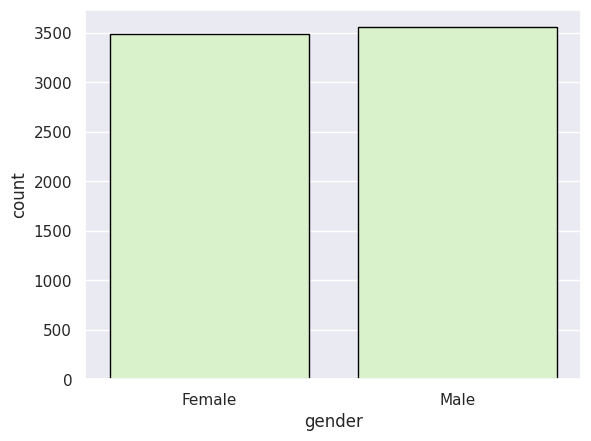

   SeniorCitizen  Ratio
0           5901 83.785
1           1142 16.215


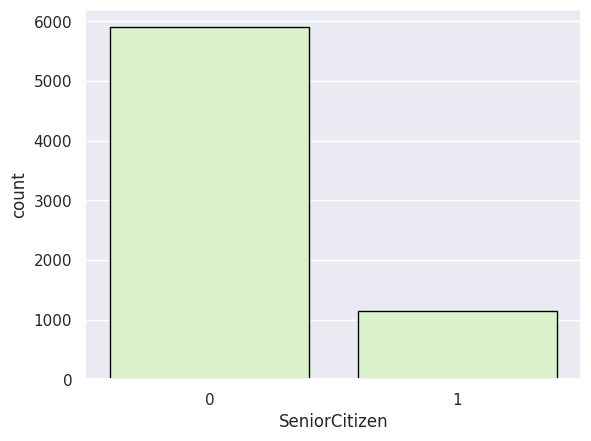

     Partner  Ratio
No      3641 51.697
Yes     3402 48.303


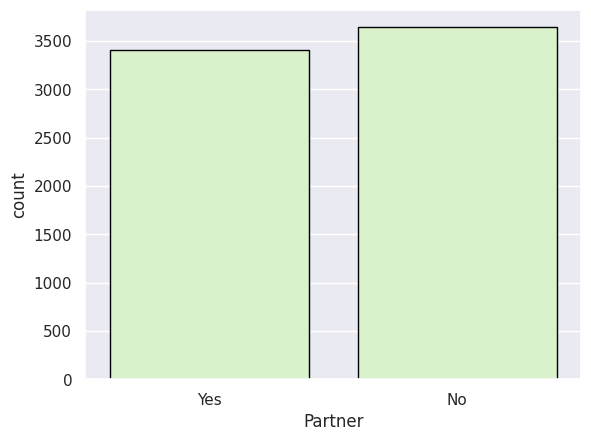

     Dependents  Ratio
No         4933 70.041
Yes        2110 29.959


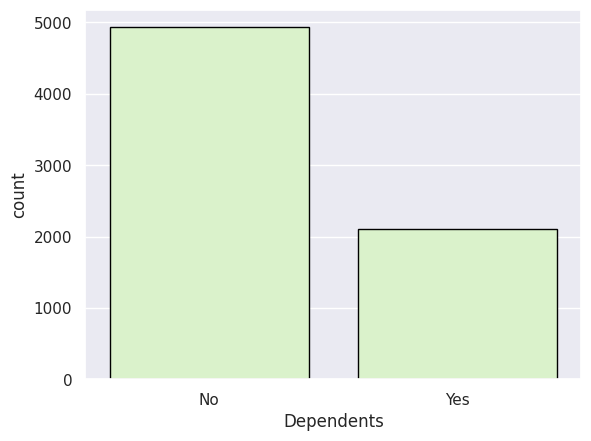

     PhoneService  Ratio
Yes          6361 90.317
No            682  9.683


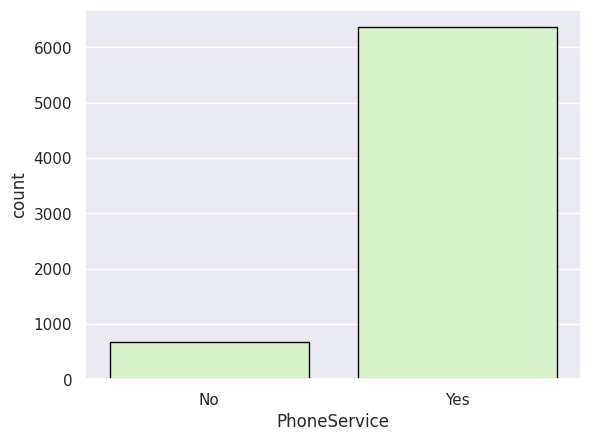

                  MultipleLines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683


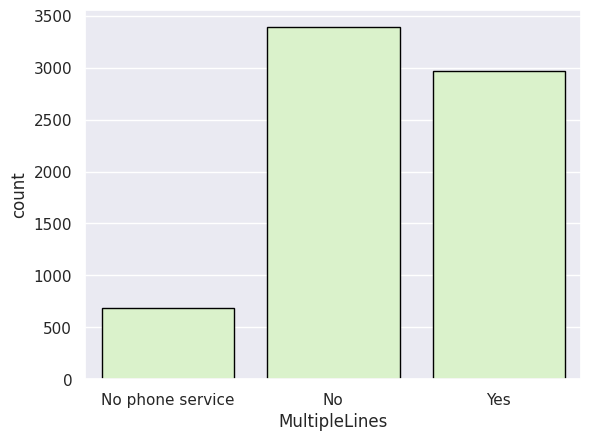

             InternetService  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667


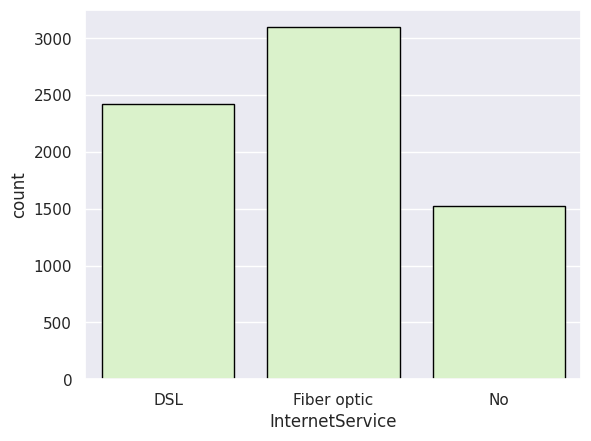

                     OnlineSecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667


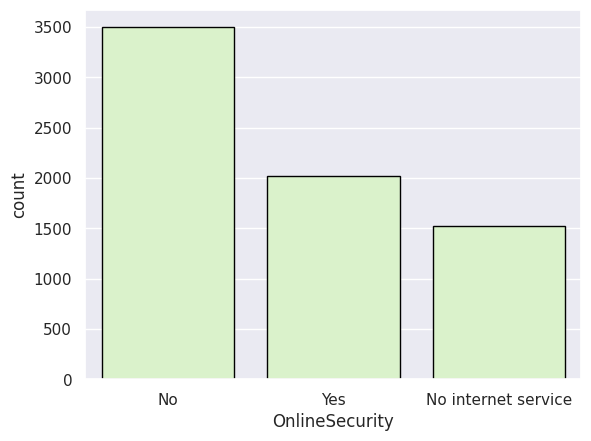

                     OnlineBackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667


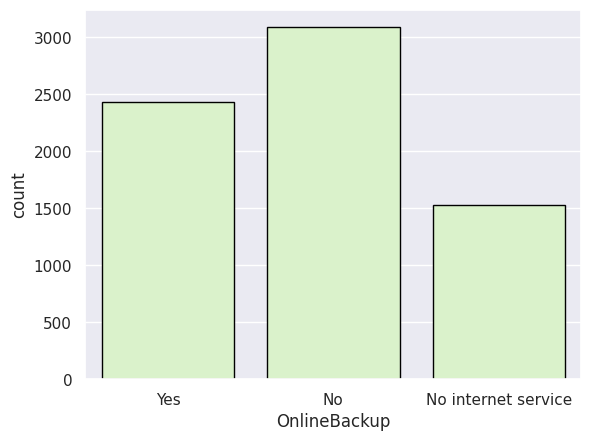

                     DeviceProtection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667


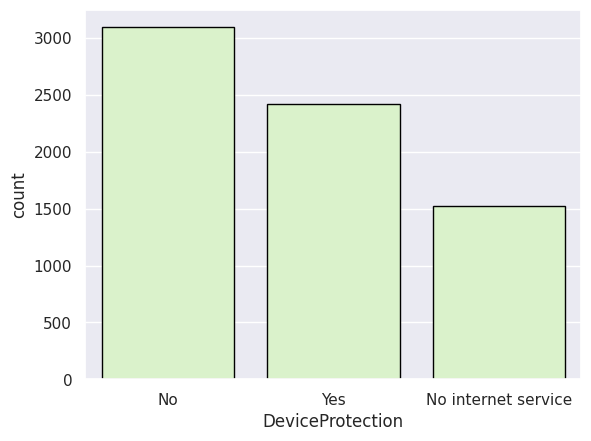

                     TechSupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667


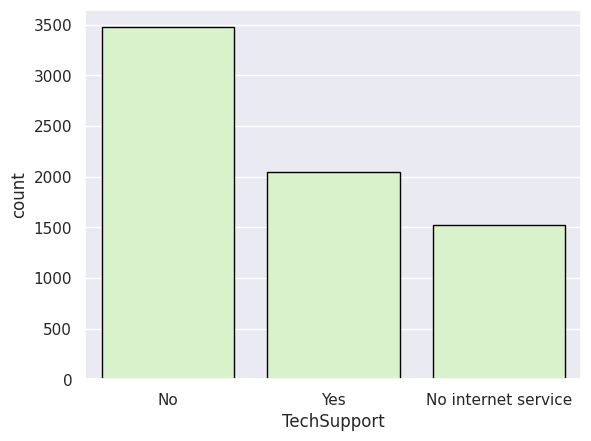

                     StreamingTV  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667


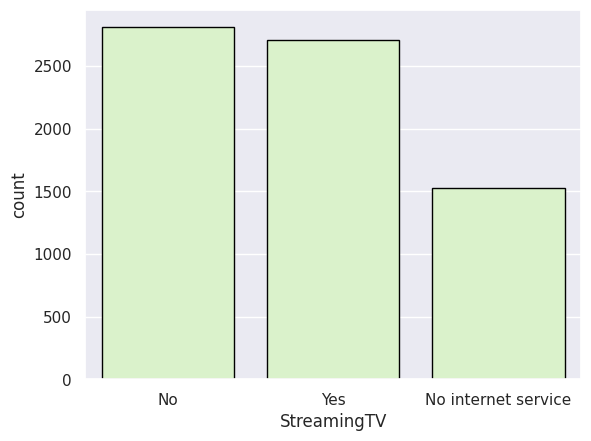

                     StreamingMovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667


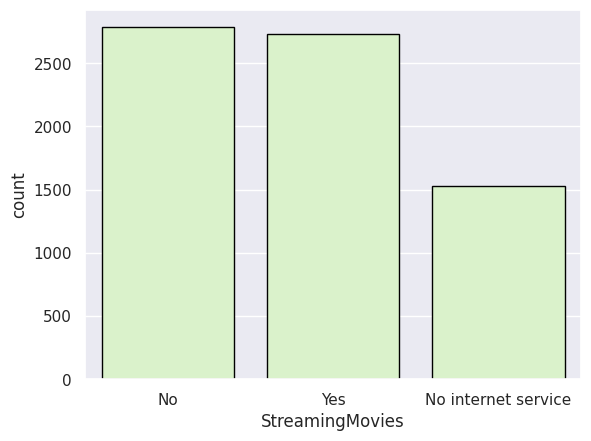

                Contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914


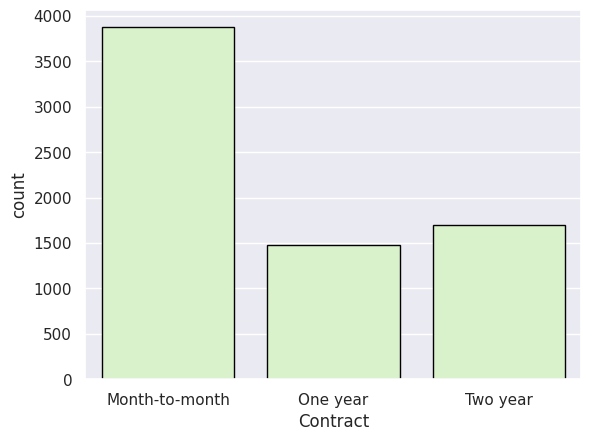

     PaperlessBilling  Ratio
Yes              4171 59.222
No               2872 40.778


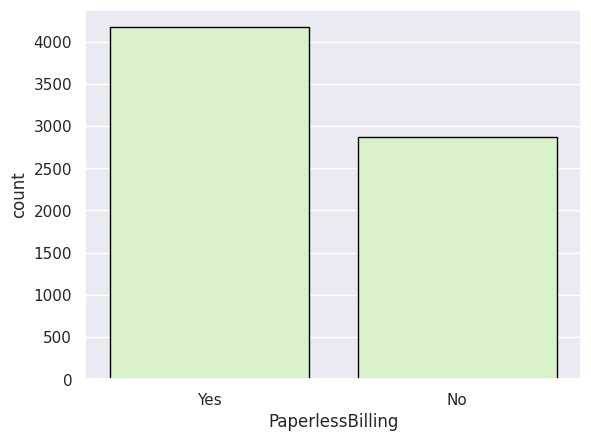

                           PaymentMethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610


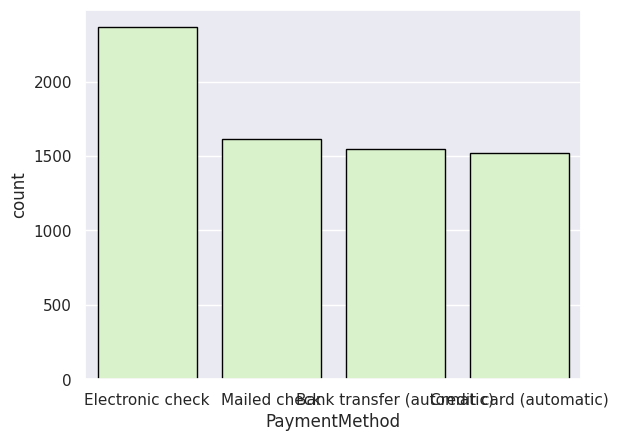

   Churn  Ratio
0   5174 73.463
1   1869 26.537


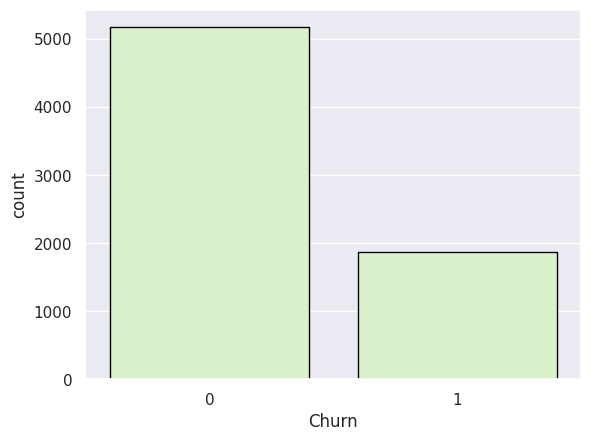

In [ ]:
def cat_summary( dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio':100 * dataframe[col_name].value_counts()/len(dataframe)}))

    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe, edgecolor='black', color='#D9F9C4')
        plt.show(block = True)

for col in cat_cols:
    cat_summary(df, col, plot = True)

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


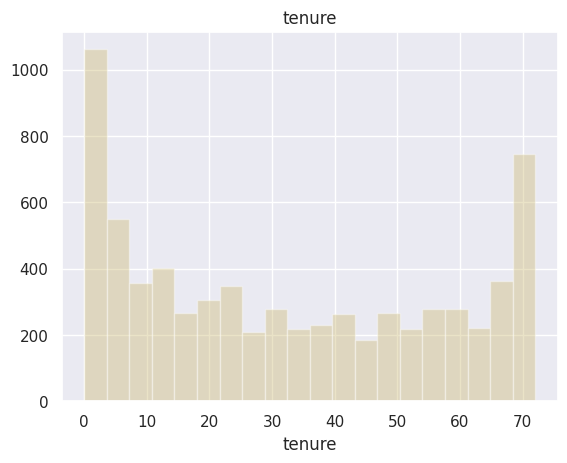

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


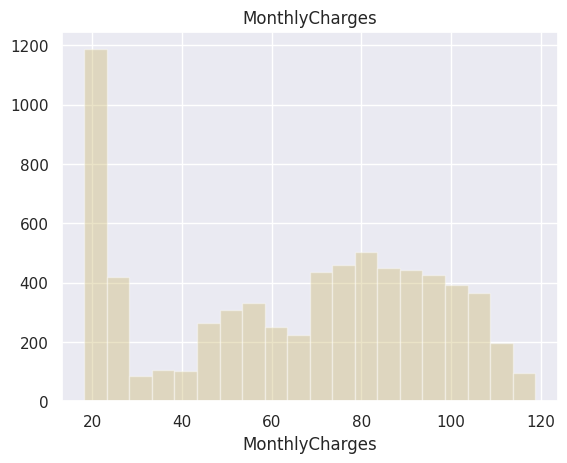

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


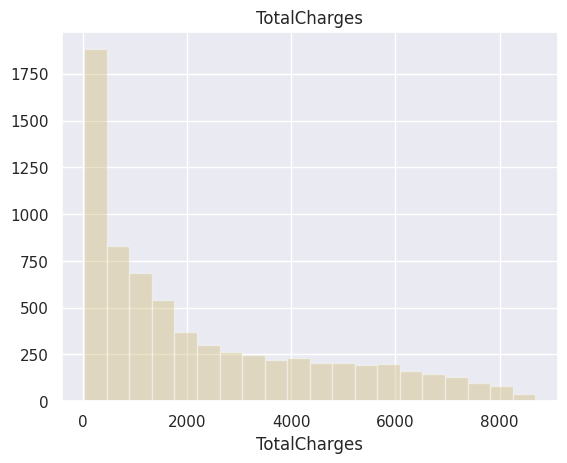

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20, alpha=0.4, color = 'y')
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

In [ ]:
def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({" ": dataframe.groupby(categorical_col)[target].mean()}))

for col in cat_cols:
    target_summary_with_cat(df,"Churn",col)

            
gender      
Female 0.269
Male   0.262
                   
SeniorCitizen      
0             0.236
1             0.417
             
Partner      
No      0.330
Yes     0.197
                
Dependents      
No         0.313
Yes        0.155
                  
PhoneService      
No           0.249
Yes          0.267
                      
MultipleLines         
No               0.250
No phone service 0.249
Yes              0.286
                     
InternetService      
DSL             0.190
Fiber optic     0.419
No              0.074
                         
OnlineSecurity           
No                  0.418
No internet service 0.074
Yes                 0.146
                         
OnlineBackup             
No                  0.399
No internet service 0.074
Yes                 0.215
                         
DeviceProtection         
No                  0.391
No internet service 0.074
Yes                 0.225
                         
TechSupport              
N

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
TotalCharges      11  0.160


In [ ]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

df['TotalCharges'].isnull().sum()

0

<Axes: >

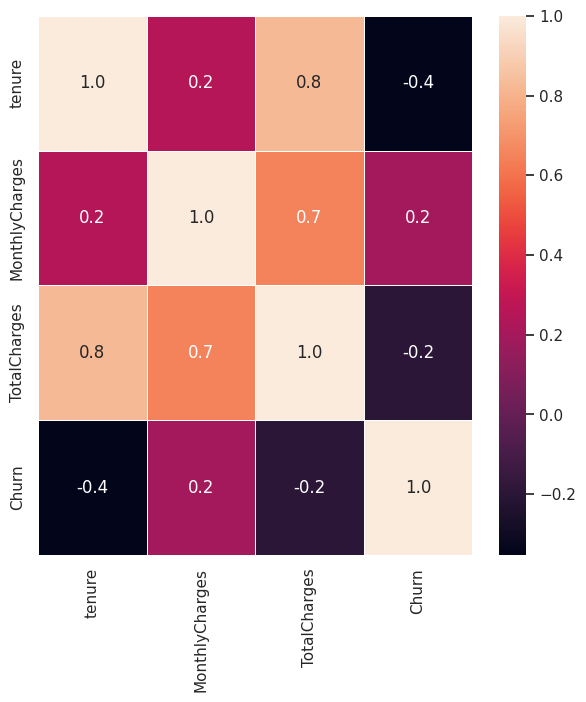

In [ ]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
df.loc[((df["gender"] == "Male") & (df["SeniorCitizen"]== 1)),"SENIOR/YOUNG_GENDER"] = "senior_male"
df.loc[((df["gender"] == "Female") & (df["SeniorCitizen"]== 0)),"SENIOR/YOUNG_GENDER"] ="young_male"
df.loc[((df["gender"] == "Male") & (df["SeniorCitizen"]== 1)),"SENIOR/YOUNG_GENDER"] ="senior_female"
df.loc[((df["gender"] == "Female") & (df["SeniorCitizen"]== 0)),"SENIOR/YOUNG_GENDER"] ="young_female"

df.loc[((df["gender"] == "Male") & (df["TechSupport"] == "No")),"GENDER_SUPPORT"] = "no_sup_male"
df.loc[((df["gender"] == "Female") & (df["TechSupport"] == "No")),"GENDER_SUPPORT"] = "no_sup_female"

df.loc[((df["Contract"] == "Month-to-month")
       & (df["PaymentMethod"] == "Electronic check")
       & (df["gender"] == "Male")),"GENDER_EC_MONTH"] = "male_ec_month"

df.loc[((df["Contract"] == "Month-to-month")
       & (df["PaymentMethod"] == "Electronic check")
       & (df["gender"] == "Female")),"GENDER_EC_MONTH"] = "female_ec_month"

df.loc[((df["OnlineSecurity"] == "No") & (df["gender"] == "Female")), "GENDER_SECURITY"] = "no_sec_female"
df.loc[((df["OnlineSecurity"] == "Yes") & (df["gender"] == "Female")),"GENDER_SECURITY"] = "yes_sec_female"
df.loc[((df["OnlineSecurity"] == "No") & (df["gender"] == "Male")),"GENDER_SECURITY"] = "no_sec_male"
df.loc[((df["OnlineSecurity"] == "Yes") & (df["gender"] == "Male")),"GENDER_SECURITY"] = "yes_sec_male"

df.loc[((df["InternetService"] == "Fiber optic")
       & (df["gender"] == "Male")
       & (df["Dependents"] == "No")),"GENDER_FIB_DEP"] = "male_fib_dep_no"

df.loc[((df["InternetService"] == "Fiber optic")
       & (df["gender"] == "Female")
       & (df["Dependents"] == "No")),"GENDER_FIB_DEP"] = "female_fib_dep_no"

df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

df.loc[((df["Partner"] == "No") & (df["Contract"] == "Month-to-month")),"PARTNER_CONTR"] = "no_partner_month"
df.loc[((df["Partner"] == "Yes") & (df["Contract"] == "Month-to-month")),"PARTNER_CONTR"] = "yes_partner_month"

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 27
cat_cols: 24
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [ ]:
le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    df = label_encoder(df, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 30 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols)

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277,-1.160,-0.994
1,0.066,-0.260,-0.173
2,-1.237,-0.363,-0.960
3,0.514,-0.747,-0.195
4,-1.237,0.197,-0.940


In [ ]:
y = df["Churn"]
X = df.drop(["Churn"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X, y, scoring="accuracy")

Base Models....
accuracy: 0.8052 (LR) 
accuracy: 0.7694 (KNN) 
accuracy: 0.7294 (CART) 
accuracy: 0.7887 (RF) 
accuracy: 0.8008 (Adaboost) 
accuracy: 0.8048 (GBM) 
accuracy: 0.7813 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1246, number of negative: 3449
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 4695, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265389 -> initscore=-1.018146
[LightGBM] [Info] Start training from score -1.018146
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1246, number of negative: 3449
[LightGBM] [Warning] A

In [ ]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500]}


classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]


In [ ]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [ ]:
def fit_models(X,y):
    base_models(X, y)
    best_models = hyperparameter_optimization(X, y)
    return best_models

best_models = fit_models(X_train, y_train)

Base Models....
roc_auc: 0.8404 (LR) 
roc_auc: 0.783 (KNN) 
roc_auc: 0.6664 (CART) 
roc_auc: 0.8171 (RF) 
roc_auc: 0.838 (Adaboost) 
roc_auc: 0.8386 (GBM) 
roc_auc: 0.8194 (XGBoost) 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 998, number of negative: 2758
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265708 -> initscore=-1.016508
[LightGBM] [Info] Start training from score -1.016508
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2759
[LightGBM] [Warning] Auto-choosin

In [ ]:
lgbm_model = best_models['LightGBM'].fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


In [ ]:
y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.81      0.80      1409



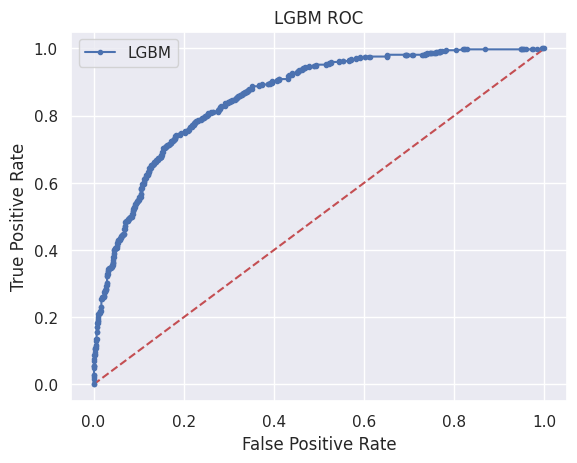

In [ ]:
lgbm_roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, marker='.', label='LGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("LGBM ROC")
plt.legend()
plt.show()

In [ ]:
X.columns
random_user = X.sample(1, random_state = 42)
lgbm_model.predict(random_user)

array([1])

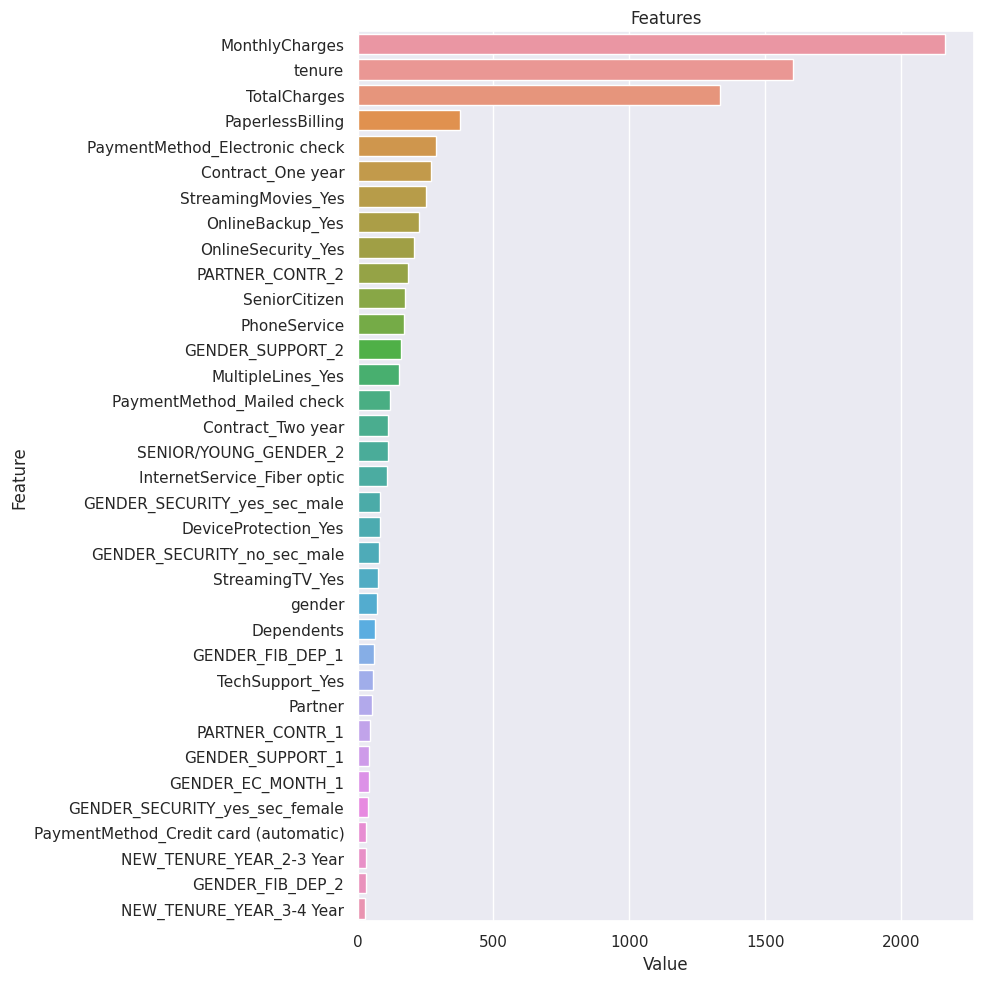

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(lgbm_model, X_train, num=35)